# [0] 연구목표

- 범주형 데이터로 이진분류
- 정답 데이터는
    - 0 혹은 1
    - 타겟값은 확률, 피처데이터가 정답 1에 속할 확률
        - 피처데이터가 특정 동물일 확률
        - sample_submission의 타겟값에 세팅해서 제출
            - kaggle을 통해 점수 체크 가능
            - 최종 점수가 전체 랭크에서 어디에 있는지 체크해서 종료!

- 목표
    - 분류 문제에 대한 절차적인 처리
    - 피처엔지니어링 중점
    - 모델 최적화
        - 전통기법
        - 파이캐럿, automl등 활용 성능 극대화

- 특징
    - 피처 의미 제공 X -> 인사이트 X
        - 데이터로만 판단
    - 피처 특징
        - bin_ : 이진피처 (고유값 2개)
        - nom_ : 범주형(명목형)피처 (고유값 건건이 다름)
        - ord_ : 범주형(순서용피처) -> 고유값들의 순사가 어떤 영향을 미칠것으로 예상
        - day : 고유값 7개 : 요일(1~7)
        - month : 고유값 12개 : 1월 ~ 12월
    - 타겟값
        - 범주형
        - 0 or 1
        - 이진 분류
    - 제출/평가
        - 1을 예측한 확률(predict_proba())

# [1] 데이터 획득

In [111]:
# 데이터 분석용
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [112]:
train = pd.read_csv('/content/drive/MyDrive/ASAC/Python 머신러닝/data/train.csv', index_col = 'id')
test = pd.read_csv('/content/drive/MyDrive/ASAC/Python 머신러닝/data/test.csv', index_col = 'id')
submission = pd.read_csv('/content/drive/MyDrive/ASAC/Python 머신러닝/data/sample_submission.csv')

In [113]:
train.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [114]:
test.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
300000,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,Piano,...,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
300001,0,0,0,T,N,Red,Square,Lion,Canada,Piano,...,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
300002,1,0,1,F,Y,Blue,Square,Dog,China,Piano,...,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12
300003,0,0,1,T,Y,Red,Star,Cat,China,Piano,...,0b6ec68ff,b5de3dcc4,1,Contributor,Lava Hot,b,Q,ke,2,3
300004,0,1,1,F,N,Red,Trapezoid,Dog,China,Piano,...,f91f3b1ee,967cfa9c9,3,Grandmaster,Lava Hot,l,W,qK,4,11


In [115]:
submission.head()

,id,target
0,300000,0.5
1,300001,0.5
2,300002,0.5
3,300003,0.5
4,300004,0.5


In [116]:
# 피처가 많아서 식별이 어려움 -> 전치행렬로 보면 됨
train.head().T

id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada
nom_4,Bassoon,Piano,Theremin,Oboe,Oboe


## [-]현재까지 파악한 내용
- bin_0~5 : 6개 피처
- nom_0~9 : 범주형(명목형) 10개 피처
- ord_0~5 : 범주형(순서형) 6개 피처
- 날짜 : day, month 각각 1개 피처
- 정답 : target, 0 or 1
- submission : id와 target 값 세팅
    - target값 1을 예측할 확률
    - predict_proba(테스트데이터)[:,1]

#[2] 데이터 준비 및 분석

- 피처엔지니어링을 위한 EDA 실시
- 어떤 작업이 필요한지 요약
- 피처 요약표 필요

## [2-1] 피처 요약, 탐색

- 피처명, 형상, 정보들, 고유값수, 샘플값 등등 => DF로 구성해서 한번에 본다

In [117]:
def summary_feature_info(df) :
    '''
        피처 요약 정보 제공 -> 피처 파악을 빠르게 하기 위함
    '''
    su_df = pd.DataFrame(df.dtypes, columns = ['type']) # 각 칼럼별 type 확인
    # 인덱스 -> 칼럼으로 이동
    su_df = su_df.reset_index()
    # 특정 칼럼명 변경
    su_df.rename(columns = {'index':'feature_name'}, inplace = True)
    # 칼럼명은 아래 이름 그대로 사용
    # 결측치수
    su_df['결측치수'] = df.isnull().sum().values
    # 고유값수
    su_df['고유값수'] = df.nunique().values
    # 샘플값_0
    su_df['샘플값_0'] = df.iloc[0].values
    # 샘플값_1
    su_df['샘플값_1'] = df.iloc[1].values
    # 샘플값_2
    su_df['샘플값_2'] = df.iloc[2].values
    return su_df

summary_feat_df = summary_feature_info(train)
summary_feat_df

# nom_5~9는 범주형 고유값이 너무 많아서 해시값으로 보임 => 삭제해도 무방할듯?

,feature_name,type,결측치수,고유값수,샘플값_0,샘플값_1,샘플값_2
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


## [2-2] 피처 요약 기준 피처엔지니어링 전략 수립

### [bin_]
- 총 5개 피처
- 고유값은 2개씩 존재
    - 이진형 데이터는 모두 정상
- 전처리 대상
    - bin_3, bin_4는 타입이 object형 -> 문자열
    - 문자열 => 수치로 변환 처리, 인코딩 처리가 필요
        - 모델 구축시 피처엔지니어링때 수행합시다

In [118]:
summary_feat_df.loc[:4]

,feature_name,type,결측치수,고유값수,샘플값_0,샘플값_1,샘플값_2
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y


In [119]:
# 실제 고유값 확인 => 처리대상 고유값 확인
for i in range(5):
    f_name = f'bin_{i}'
    print(f'{f_name}의 고유값 {train[f_name].unique()}')

bin_0의 고유값 [0 1]
bin_1의 고유값 [0 1]
bin_2의 고유값 [0 1]
bin_3의 고유값 ['T' 'F']
bin_4의 고유값 ['Y' 'N']


### [nom_]
- nom5~9는 범주형 고유값이 너무 많음 => 해시값으로 보임 => 이 피처는 제거할 가능성이 높음
- 학습은 수치로 표현되어야 함! -> 결국 수치로 변환해야겠네
    - nom_0 ~ nom_4까지 인코딩 처리해야함
        - 원-핫 인코딩 예상됨 (고유값이 6개 정도면 무난함)

In [120]:
summary_feat_df.loc[5:5+9]

,feature_name,type,결측치수,고유값수,샘플값_0,샘플값_1,샘플값_2
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin
10,nom_5,object,0,222,50f116bcf,b3b4d25d0,3263bdce5
11,nom_6,object,0,522,3ac1b8814,fbcb50fc1,0922e3cb8
12,nom_7,object,0,1220,68f6ad3e9,3b6dd5612,a6a36f527
13,nom_8,object,0,2215,c389000ab,4cd920251,de9c9f684
14,nom_9,object,0,11981,2f4cb3d51,f83c56c21,ae6800dd0


In [121]:
# 실제 고유값 확인 => 처리대상 고유값 확인
for i in range(5):
    f_name = f'bin_{i}'
    print(f'{f_name}의 고유값 {train[f_name].unique()}')

bin_0의 고유값 [0 1]
bin_1의 고유값 [0 1]
bin_2의 고유값 [0 1]
bin_3의 고유값 ['T' 'F']
bin_4의 고유값 ['Y' 'N']


### [ord_]
- 순서형 데이터임!
- ord 0~2는 사용해보도록 하고, 나머지는 사용해도 의미없을듯

In [122]:
summary_feat_df.loc[15:15+5]

,feature_name,type,결측치수,고유값수,샘플값_0,샘플값_1,샘플값_2
15,ord_0,int64,0,3,2,1,1
16,ord_1,object,0,5,Grandmaster,Grandmaster,Expert
17,ord_2,object,0,6,Cold,Hot,Lava Hot
18,ord_3,object,0,15,h,a,h
19,ord_4,object,0,26,D,A,R
20,ord_5,object,0,192,kr,bF,Jc


In [123]:
for i in range(5):
    f_name = f'ord_{i}'
    print( f'{f_name}의 고유값 { train[f_name].unique() }')

# 순서 : 1 -> 2 -> 3
# 캐글 등급 : Novice -> Contributor -> Expert -> Master -> Grandmaster
# 덥고 추운 등급 : Freezing -> Cold -> Warm -> Hot -> Boiling Hot -> Lava Hot
# ord_3 : 단어들
# ord_4 : A-Z

ord_0의 고유값 [2 1 3]
ord_1의 고유값 ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2의 고유값 ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']
ord_3의 고유값 ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4의 고유값 ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']


### [day, month]
- 순환형 데이터! (순서는 없음)

In [124]:
train['day'].unique(), train['month'].unique()

(array([2, 7, 5, 4, 3, 1, 6]),
 array([ 2,  8,  1,  4, 10,  3,  7,  9, 12, 11,  5,  6]))

### [target]

In [125]:
train['target'].unique()

array([0, 1])

##[2-3] EDA를 통한 데이터 분석

- 목표
    - 피처 데이터
        - 고유한 피처 데이터에 대한 비중 검사
            - 바차트 확률이 높다
            - 데이터의 불균형도 체크
    - 타겟 데이터
        - 타겟값 1에 대한 비율 체크
        - 고유한 피처 데이터 대비 타겟 데이터의 비율 시각화

- EDA
    - 수치형 -> displot()
    - 범주형  -> countplot()

### 타겟(정답) 분포 확인

<Axes: xlabel='target', ylabel='count'>

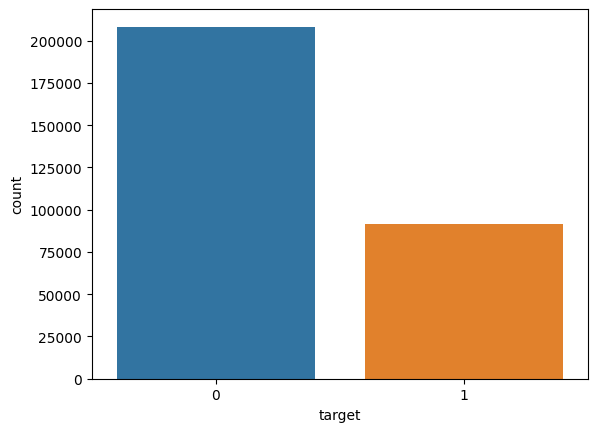

In [126]:
sns.countplot(data = train, x = 'target')
# 0이 1보다 훨씬 많다

In [127]:
# 0과 1의 비율 체크 : 0카운트 / 1카운트
t0, t1 = np.unique(train.target.values, return_counts = True)[1]
t0 / t1 # 0카운트는 1카운트에 비해 2.26배 정도 데이터가 더 많다
# 피처별 고유 데이터에서도 이 비율이 유지되는가?

2.2692559173532105

(<Axes: xlabel='target', ylabel='count'>,
 [69.41199999999999, 30.587999999999997])

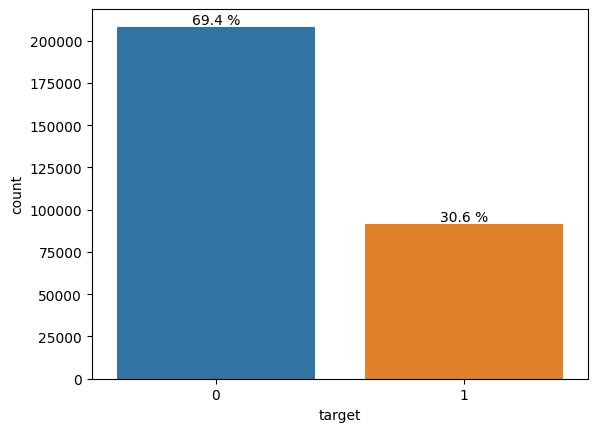

In [128]:
# 카운트 플롯 내부에 비중(%)를 표기 -> 함수로 만들어두자
def draw_text_by_ax(ax, data) :
    percents = list()
    for patch in ax.patches: # 개별 바 정보 추출
        rate = patch.get_height() / data.shape[0] * 100
        ax.text(x = patch.get_x() + patch.get_width()/2, # 바의 x위치(0)에서 상대적으로 너비 /2만큼 중앙 이동
                y = patch.get_height() + data.shape[0]*0.005, # 바의 y위치 조정
                s = f'{rate:1.1f} %',
                ha = 'center')
        percents.append(rate)
    return ax, percents

draw_text_by_ax(sns.countplot(data = train, x = 'target'), train)

### [bin_xxx] : 이진 피처
- 범주형 피처의 고유값별 타겟값 비중 확인
    - 비율이 유지되는가? 다른가?
    - 다르다면 어느쪽에 편중되어 있는가?

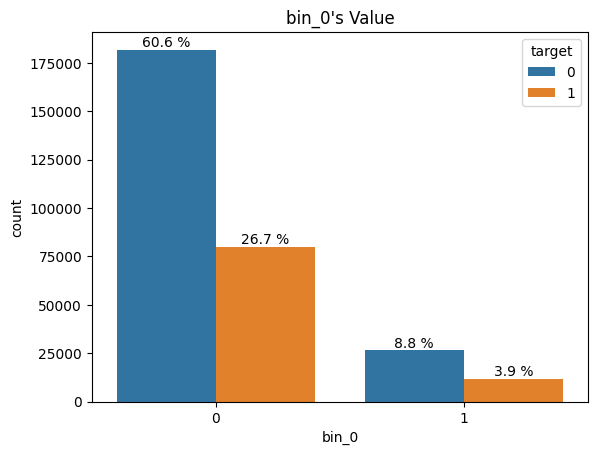

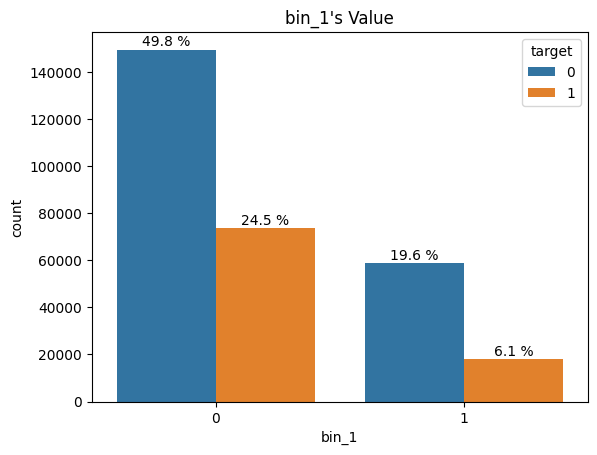

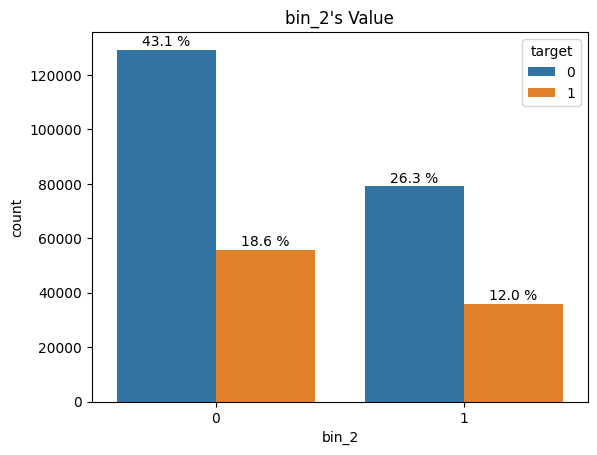

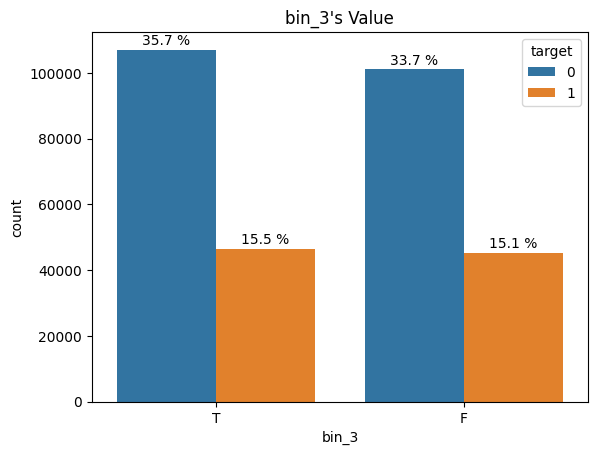

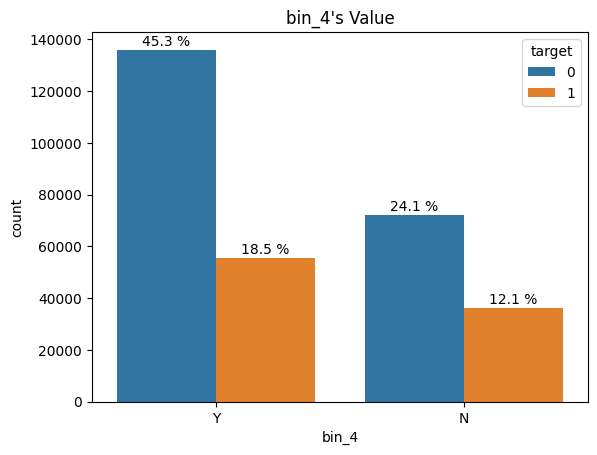

In [129]:
bin_features = [f'bin_{i}' for i in range(5)]
bin_logs = dict()
for feat in bin_features:
    ax, percents = draw_text_by_ax(sns.countplot(data = train, x = feat, hue = 'target'), train)

    # 피처별로 비중 정보를 모은다
    bin_logs[feat] = percents
    ax.set_title(f'{feat}\'s Value')
    plt.show()

# 모든 고유값에서 0이 1보다 크다라는 추세는 변함이 없다 => 모두 사용 가능한것으로 보임

In [130]:
rates_df = pd.DataFrame(bin_logs)
rates_df

,bin_0,bin_1,bin_2,bin_3,bin_4
0,60.595333,49.811333,43.079333,35.695000,45.346333
1,8.816667,19.600667,26.332667,33.717000,24.065667
2,26.654333,24.528000,18.598333,15.483333,18.531333
3,3.933667,6.060000,11.989667,15.104667,12.056667


In [131]:
# 고유값별 0과 1이 차지하는 비율 체크
a = rates_df.iloc[0] / rates_df.iloc[2]
b = rates_df.iloc[1] / rates_df.iloc[3]

a,b

# 대부분 비슷한 비율이 유지되지만 bin_1, bin_4의 두번째 고유값에서 비중 차이가 남
# 그러나 추세는 동일, 비율의 차이는 있음 => 모두 학습에 사용해도 무방
# 만약, 다른 추세거나 비율이 현저히 다르다면 피처 사용 판단의 대상이 됨

(bin_0    2.273376
 bin_1    2.030795
 bin_2    2.316301
 bin_3    2.305382
 bin_4    2.447009
 dtype: float64,
 bin_0    2.241335
 bin_1    3.234433
 bin_2    2.196280
 bin_3    2.232224
 bin_4    1.996046
 dtype: float64)

### [nom_xxx] : 명목형 피처
- 대상
    - 고유값이 6개 미만
        - EDA
    - 고유값 6개 이상
        - 차후 인코딩 처리 -> 데이터 개수 대비고유값수가 적다 -> 의미가 있는 데이터로 판단 (해시값으로 마스킹 처리)
            - 원핫인코딩
            - 피처제거 방법
            - 해싱 인코딩 + % -> 비율 축소 전략
            - 프리퀀시(빈도) 인코딩 -> 비중표현 전략
- 시각화
    - 데이터 교차 분석표 기반
    - 2개 차트 혼합
        - X축 피처별 고유값
        - y축
            - left : 고유값 카운트
            - right : 정답 1에 대한 고유값별 차지하는 비율

### 데이터 교차 분석표

- cross-tabulation
- 범주형 데이터 2개를 분석할 때 사용
- 빈도와 통계량을 행렬로 결합한 표
- 고유값별 정답 1이 차지하는 비율을 표현하는 표

In [132]:
# count형태로 표현
pd.crosstab(train['nom_0'], train['target'])

target,0,1
nom_0,,
Blue,72914,23252
Green,85682,41659
Red,49640,26853


In [133]:
# 백분율 표현
cross_tab = pd.crosstab(train['nom_0'], train['target'], normalize = 'index') * 100
cross_tab.reset_index(inplace = True)
cross_tab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [134]:
# 교차 분석표를 만드는 함수
def make_cross_tabul(df, f_nm, target_nm):
    cross_tab = pd.crosstab(df[f_nm], df[target_nm], normalize = 'index') * 100
    cross_tab.reset_index(inplace = True)
    return cross_tab

cross_tab = make_cross_tabul(train, 'nom_0', 'target')
cross_tab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [135]:
# 고유값별 정답 1에 대한 비율
cross_tab[1]

0    24.179024
1    32.714522
2    35.105173
Name: 1, dtype: float64

### 포인트 plot 시각화

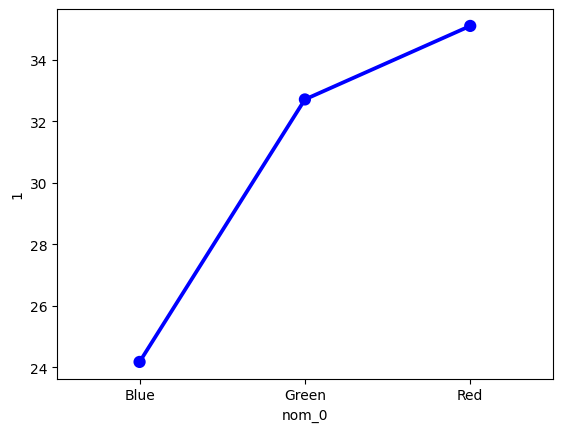

In [136]:
def show_pointplot(x_nm, y_nm, data, color = 'blue' ,ax = None):
    sns.pointplot(x = x_nm,
                  y = y_nm,
                  data = data, # 전체데이터 (교차분석표데이터)
                  order = data[x_nm], # x값이 배치되는 순서 Blue - Green - Red
                  color = color,
                  ax = ax

                  )

show_pointplot('nom_0', 1, cross_tab)

### 카운트plot + 포인트plot
- 이 시각화를 통해 해당 피처를 그대로 사용할지 제거할지 1차적으로 판단
    - 상호 구분이 잘되는 비율을 가지면 사용!

- 각각의 고유값들이 1을 얼마나 추종하는가?

0 nom_0
1 nom_1
2 nom_2
3 nom_3
4 nom_4


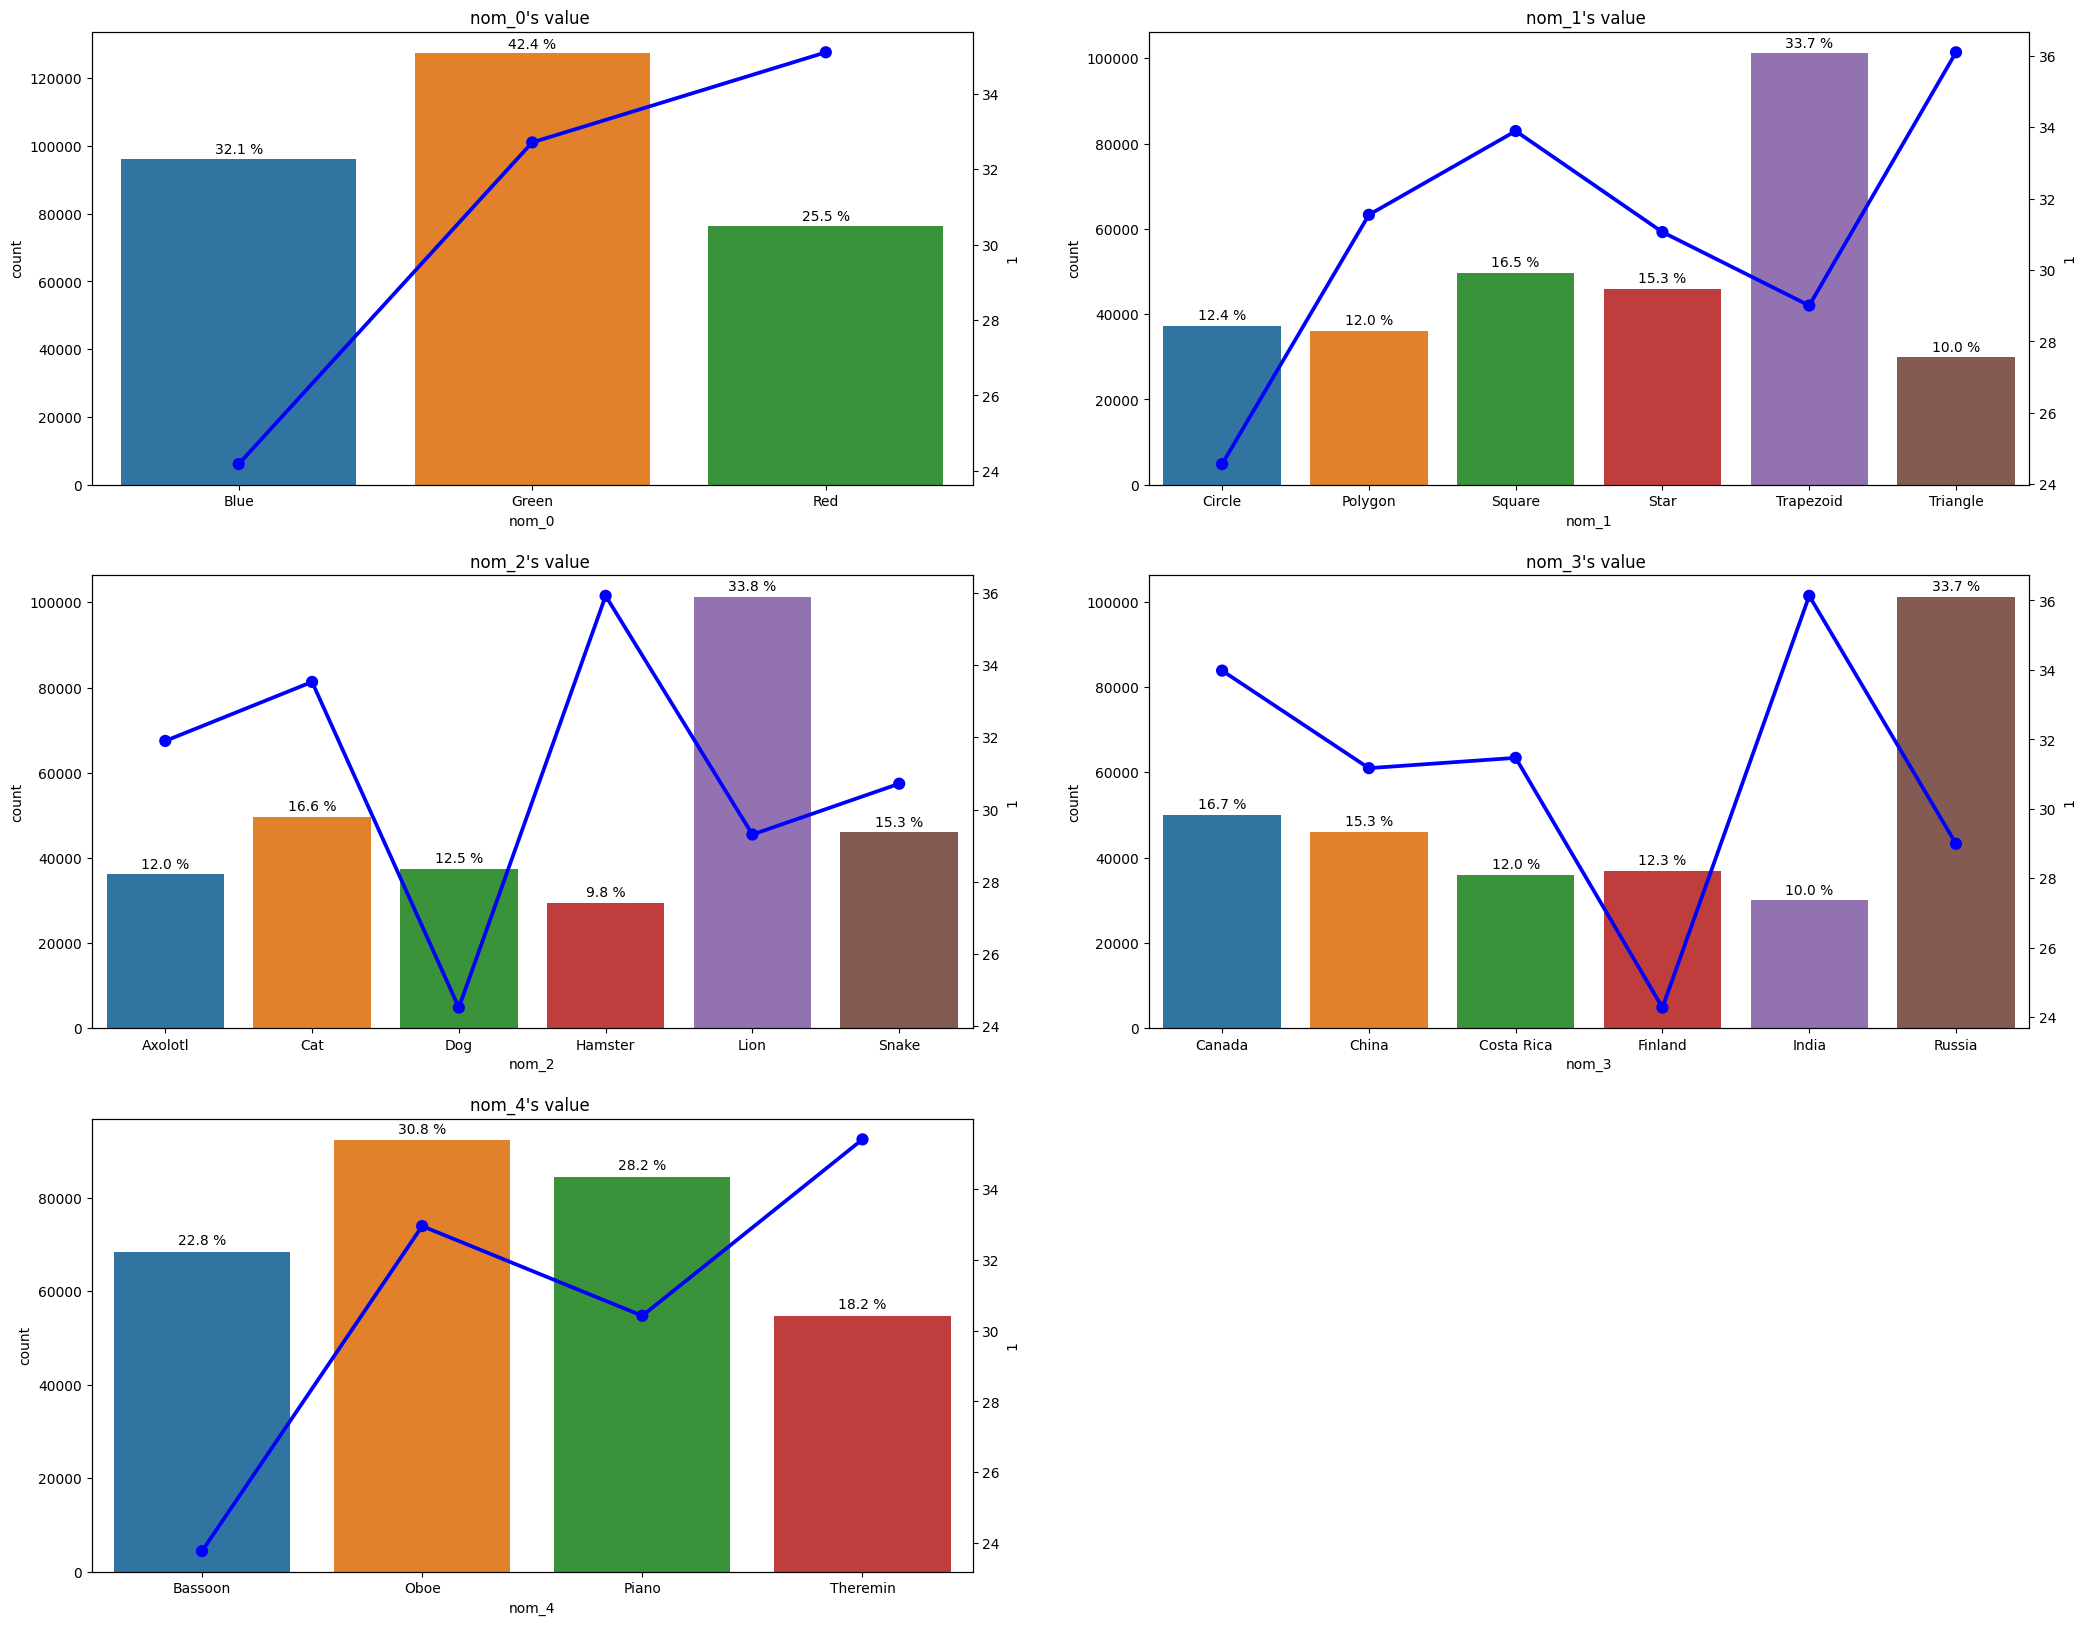

In [137]:
import matplotlib.gridspec as gs
nom_features = [f'nom_{i}' for i in range(5)]
# 격자 구성 -> 1줄에 2칸씩 배치
COLS = 2
ROWS = sum(divmod(len(nom_features), COLS))

def show_count_point_plot(df, features, t_nm ,rows, cols):
    # 격자 형태 구성
    plt.figure(figsize = (25, 20))
    gs_grid = gs.GridSpec(rows, cols) # 격자 순번대로 차트 자리 제공
    # 피처별로 순환하면서 차트를 그린다
    for idx, feature in enumerate(features):
        #1. ax정보 획득
        ax = plt.subplot(gs_grid[idx])
        #2. 교차분석표 데이터 생성
        cross_tab = make_cross_tabul(df, feature, t_nm)
        #3. 카운트플롯 그리기
        draw_text_by_ax(sns.countplot(data = df, x = feature, ax = ax, order = cross_tab[feature]),df)
        #4. 포인트플롯 그리기
        show_pointplot(feature, 1, cross_tab, ax = ax.twinx())
        #5. 제목
        ax.set_title(f'{feature}\'s value ')


        print(idx, feature)

show_count_point_plot(train, nom_features, 'target' ,ROWS, COLS)

# 해석
# 피처별 고유값별 1 등장 빈도가 다르다 => 학습에 도움이 된다(서로 다른 특징을 가지기 때문에!)
# 피처별 고유값별 정답 1이 차지하는 비율이 모두 다르다 => 예측 능력이 있다 => 학습에 도움이 된다
# 피처는 모두 사용

### [ord_xxx] : 순서형 피처
- 순서에 맞춰서 포인트 + 카운트 플롯 처리시 규칙성이 보이는지 체크

0 ord_0
1 ord_1
2 ord_2
3 ord_3
4 ord_4
5 ord_5


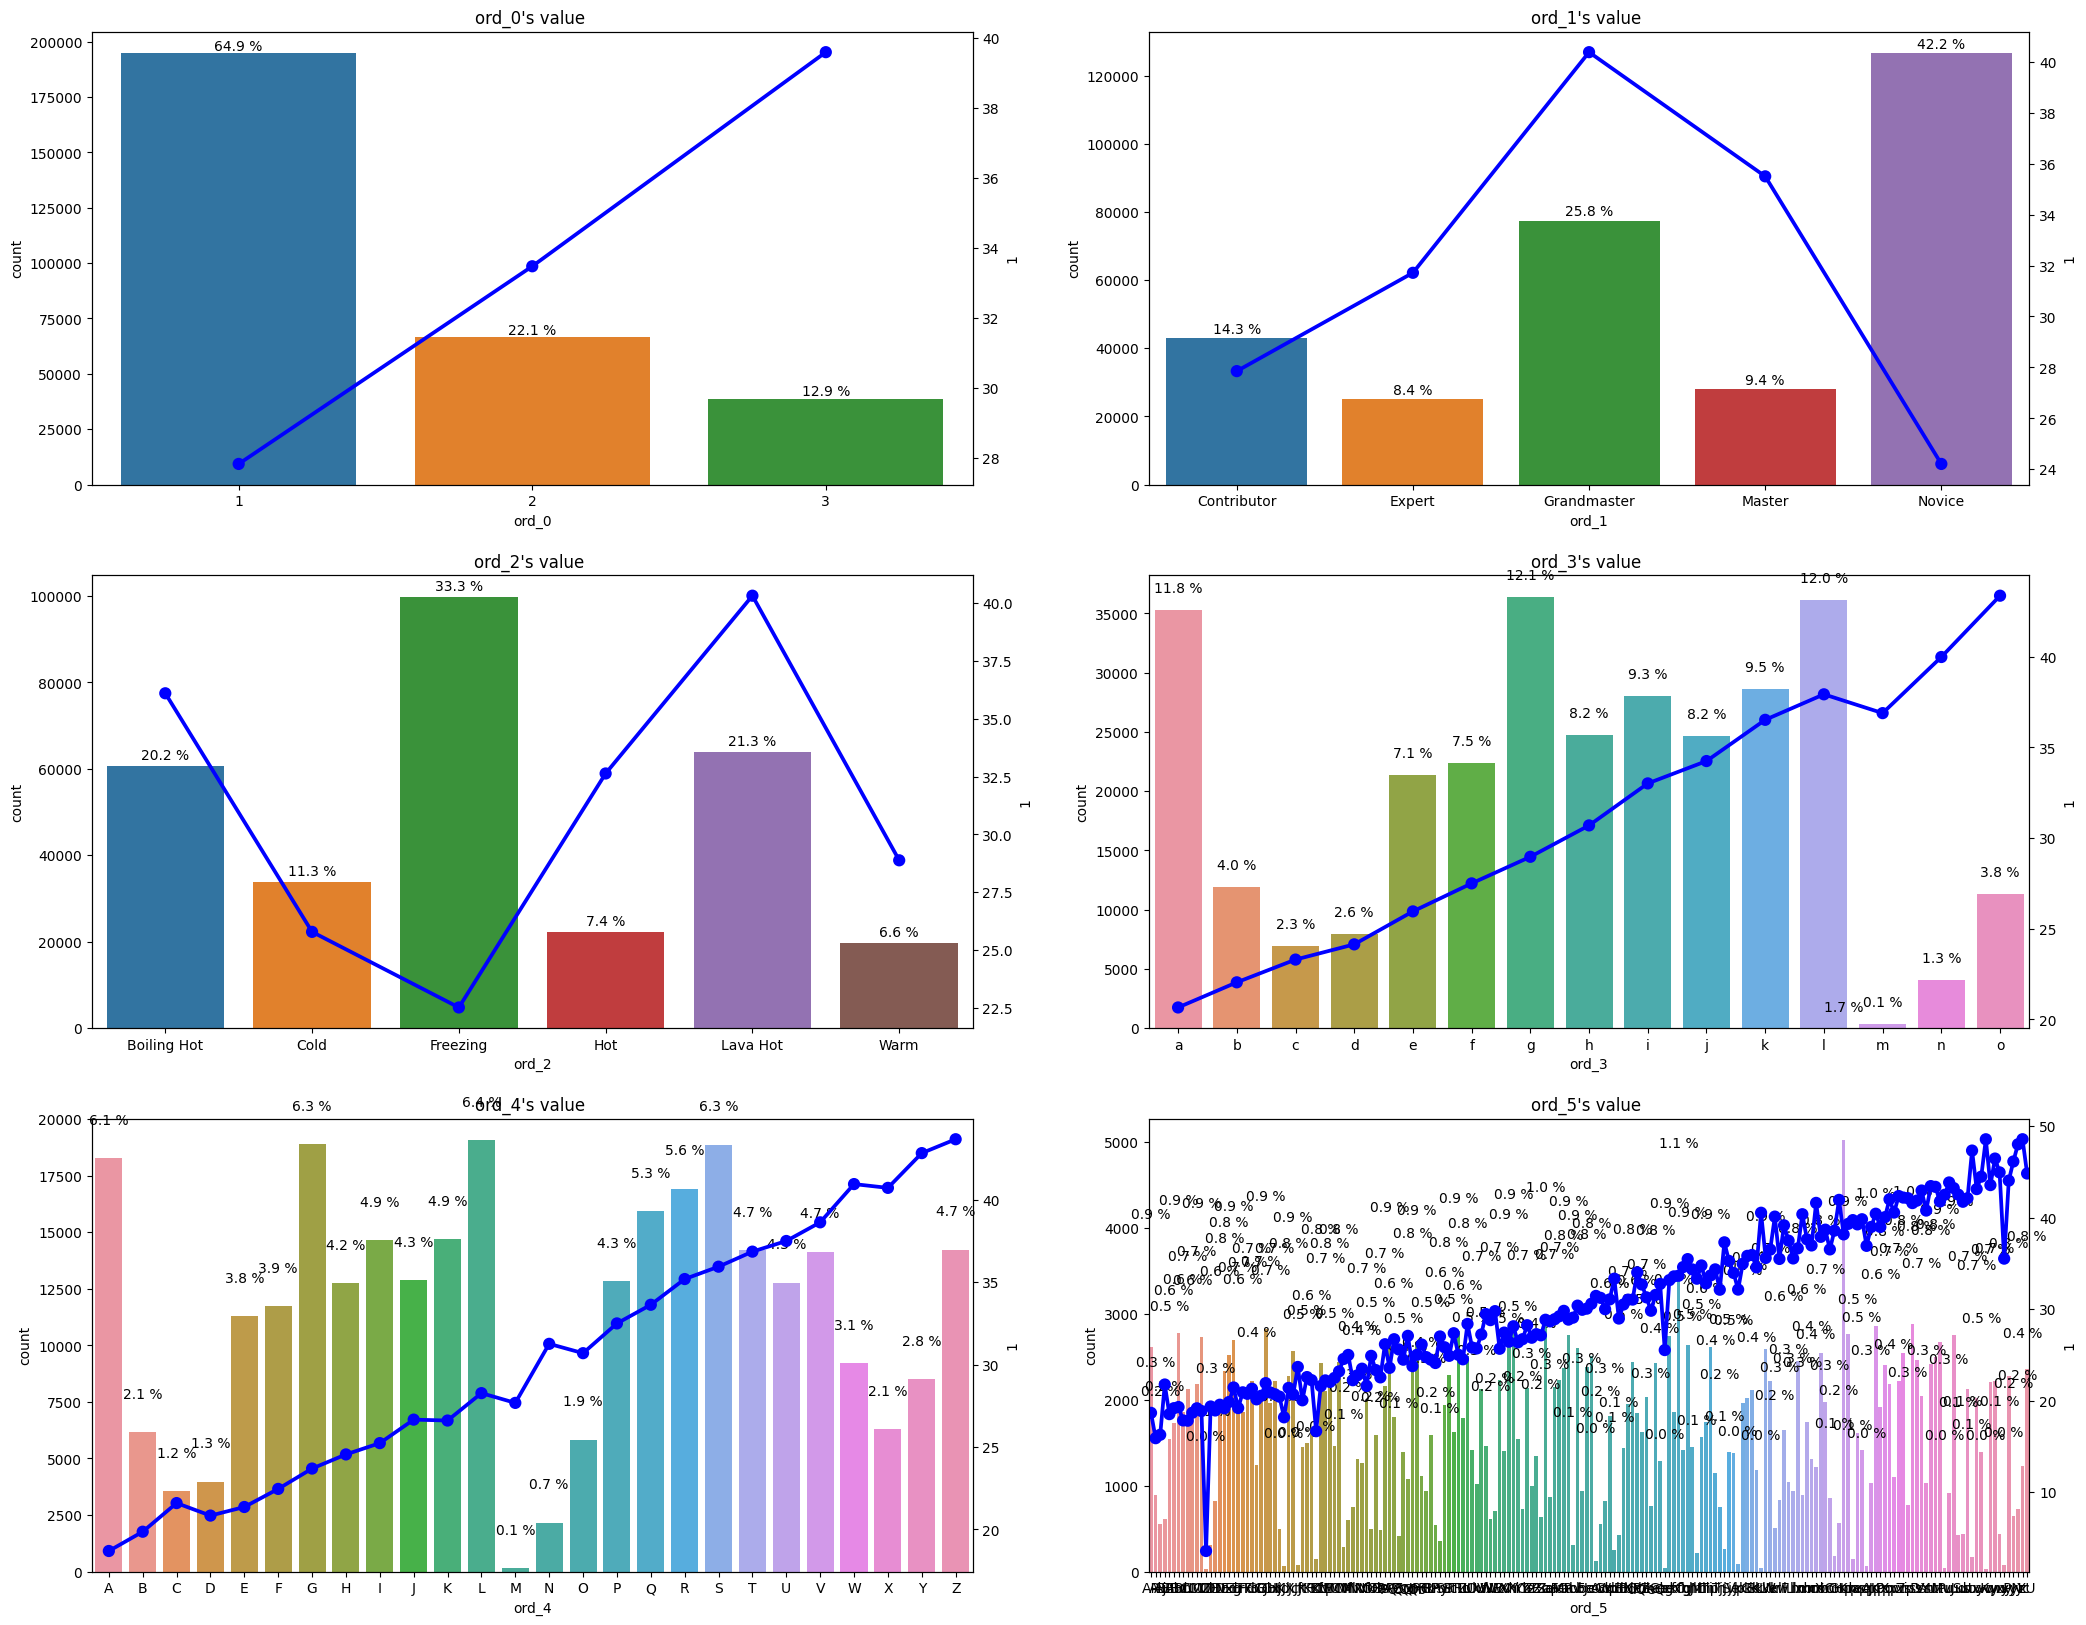

In [138]:
ord_features = [ f'ord_{i}' for i in range(6) ] # ord_0~5
COLS         = 2
ROWS         = sum(divmod( len(ord_features),  COLS))

show_count_point_plot( train, ord_features, 'target', ROWS, COLS )

# 해석
# ord_1과 ord_2번 순서 조정 필요
# 만약 조정후 모두 1의 비율이 선형구조를 따른다면 선형모델을 기반하는 분류 모델이 좋은성적을 낼수도 있을듯
# 로지스틱 회귀를 베이스라인으로 선택하는것을 검토
# 이진 분류 : 로지스틱회귀, svm

0 ord_0
1 ord_1
2 ord_2
3 ord_3
4 ord_4
5 ord_5


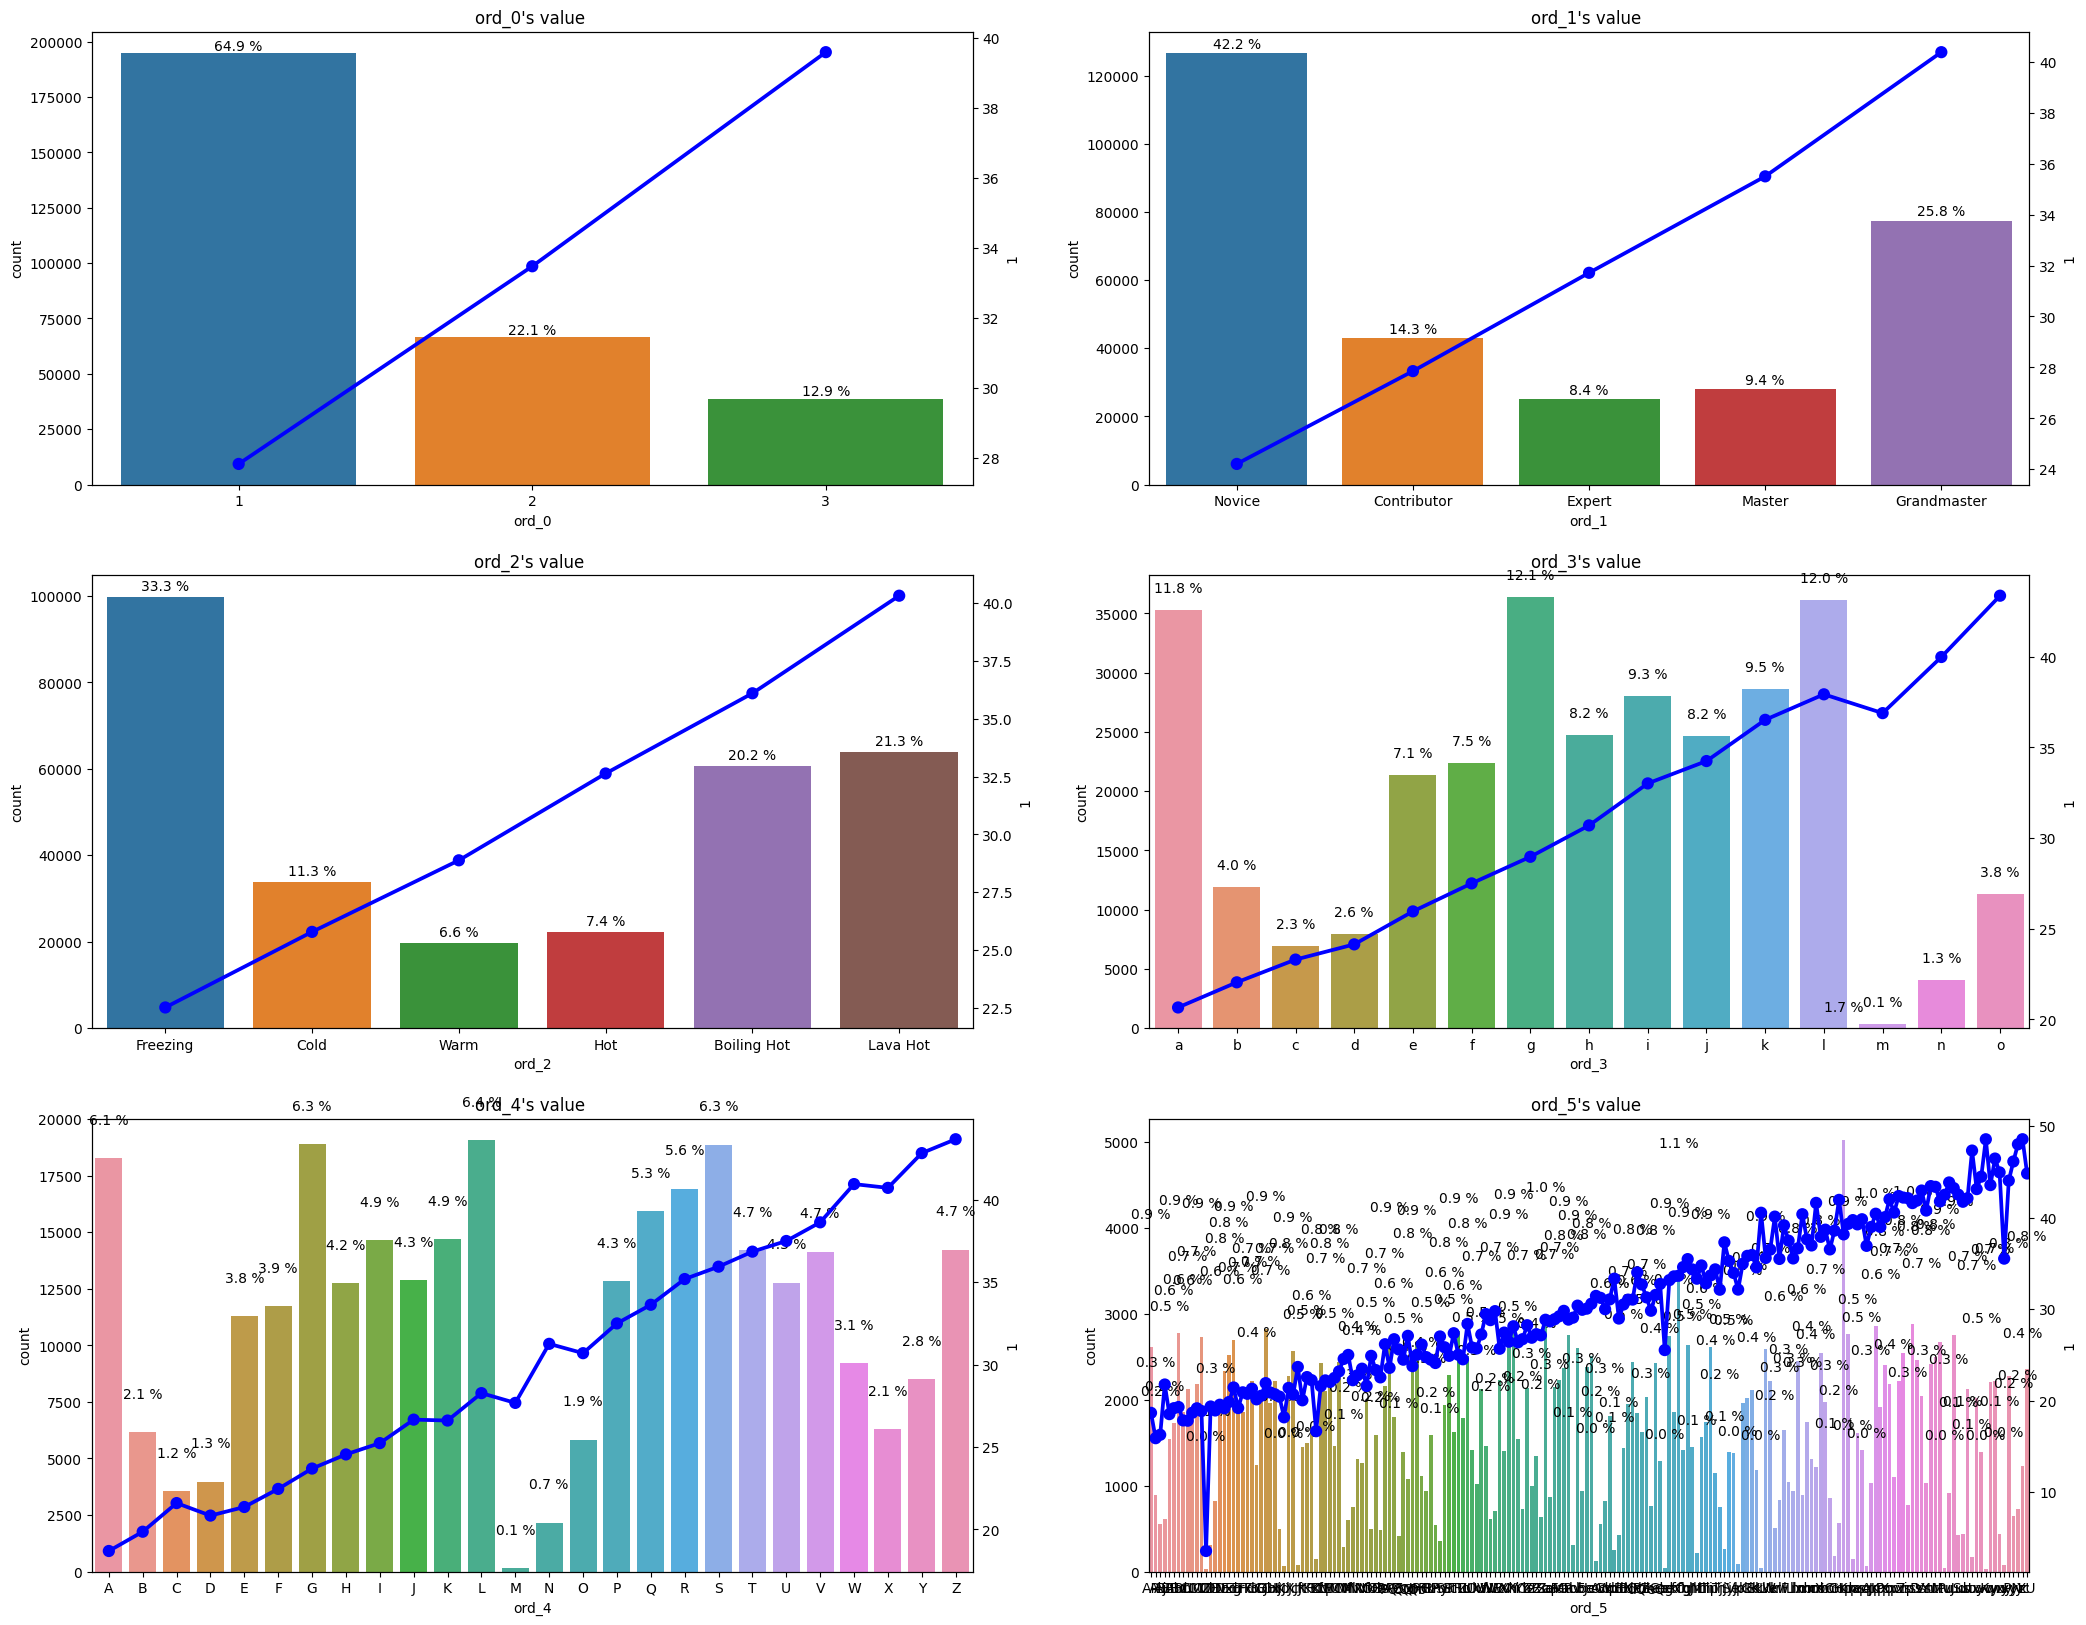

In [139]:
# 피처 순서 조정 -> 시각화를 위한 수준으로만 진행, 차후 인코딩으로 통해서 학습전에 조정 예정
from pandas.api.types import CategoricalDtype
# 새로 세팅되는 순서
ord_1 = ['Novice'   , 'Contributor' , 'Expert' , 'Master' , 'Grandmaster']
ord_2 = ['Freezing' , 'Cold'        , 'Warm'   , 'Hot'    , 'Boiling Hot' , 'Lava Hot']
# 순서 객체 생성
ord_1_type = CategoricalDtype(ord_1, True)
ord_2_type = CategoricalDtype(ord_2, True)
# 순서 적용 => Dtype을 변경
train['ord_1'] = train['ord_1'].astype( ord_1_type )
train['ord_2'] = train['ord_2'].astype( ord_2_type )
# 시각화
show_count_point_plot( train, ord_features, 'target', ROWS, COLS )

# 결론
# 순서형 피처에서 고유값의 순서에 타겟값 1의 비율은 비례한다(기울기는 체크전) -> 피처 모두 사용

### 날짜(월,일)피처

0 day
1 month


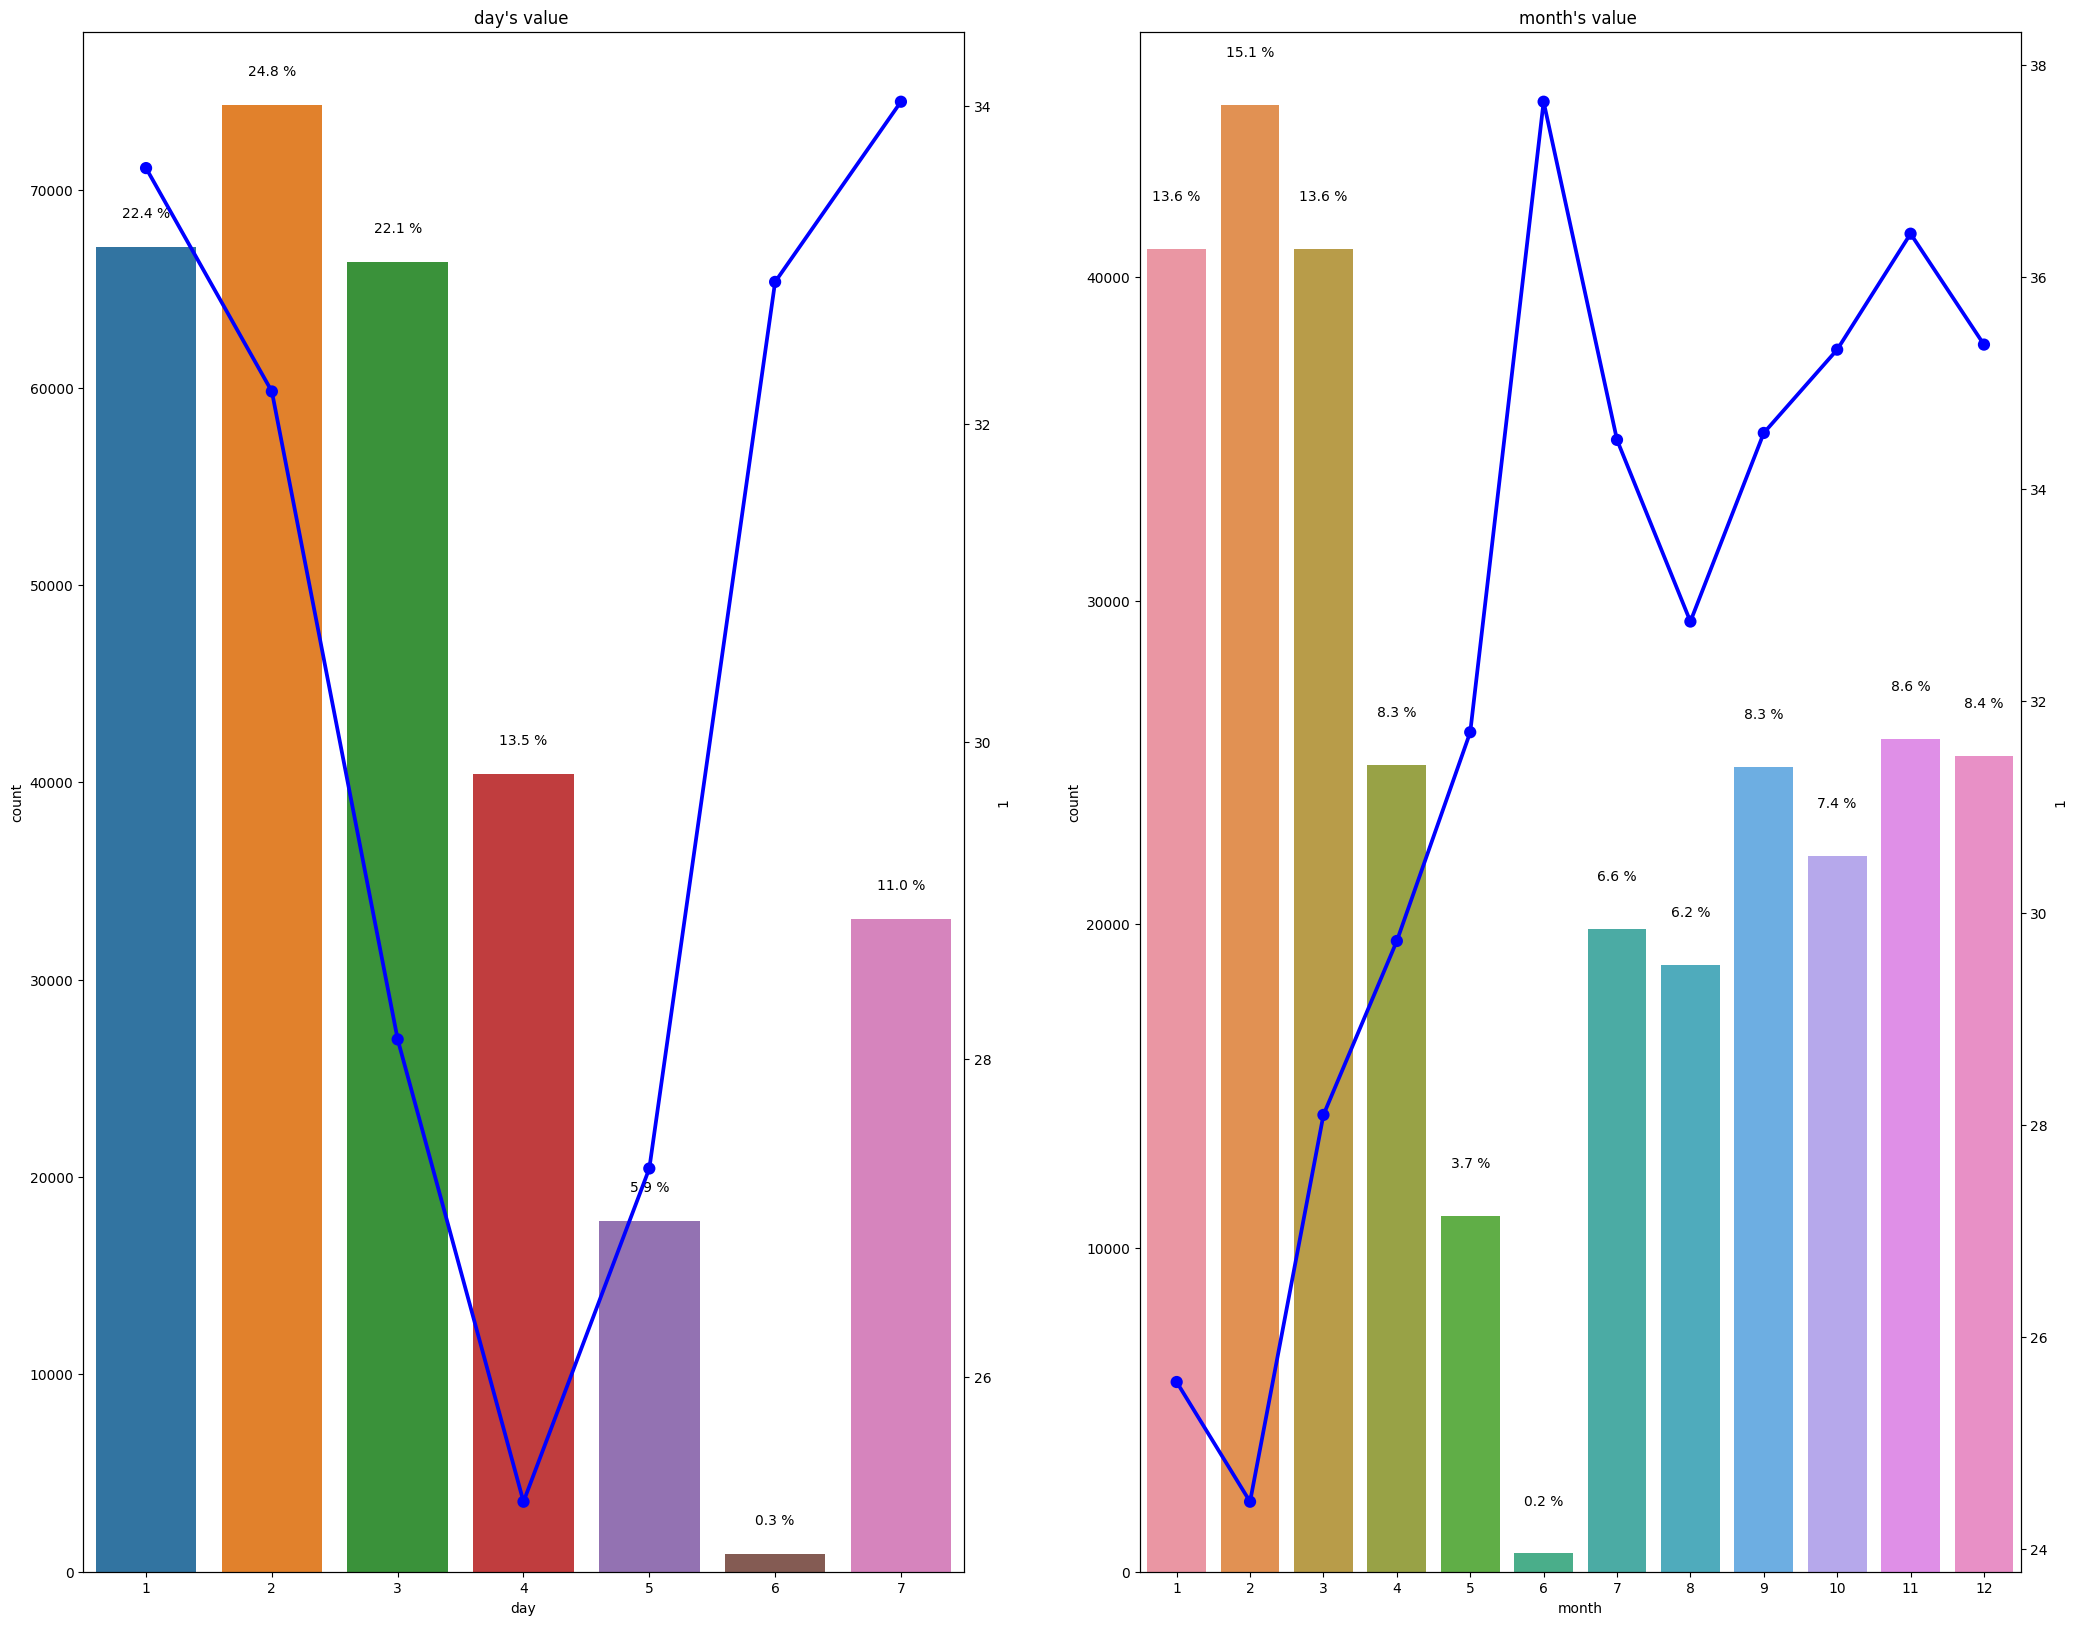

In [140]:
show_count_point_plot(train, ['day','month'], 'target' ,1, COLS)

# 바의 크기, 1의 비율은 구분된다 -> 학습에 도움이 됨 -> 피처 사용

# 순환형(주기형) 피처의 기본 인코딩 전략 => 삼각함수 인코딩
# 단순하게 처리 => 원핫인코딩전략 => 수치에 대한 영향력 제거 가능 => 19개 피처 생성될듯?

## EDA 분석 결과

- 각각에 대해 기술 (각 파트에 주석으로 기록)
- 인코딩 전략 작성

#[3] 모델 구축

## [3-1] 피처 엔지니어링

- 최종 학습에 필요한 데이터 형태 준비
    - 인코딩
    - 스케일링
    - 피처 제거, 파생변수, 결측, 이상치 처리

In [141]:
# 현재 데이터 확인
train.shape, test.shape

# 훈련용, 테스트용의 비율이 75:25는 아님 -> 테스트데이터가 많음
# 테스트데이터 => 향후 학습 데이터가 부족하다면 테스트 데이터 포함시켜서 진행 가능 (단, 캐글 등 특수상황)

((300000, 24), (200000, 23))

In [142]:
train.columns

Index(['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2',
       'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_0',
       'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month', 'target'],
      dtype='object')

In [143]:
# 특정 피처명 만드는 함수 생성
def make_feature_names(prefix_str, size, offset = 0):
    return [f'{prefix_str}_{i}' for i in range(offset, offset+size)]

make_feature_names('bin', 5)

['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']

### bin_ : 이진형

- bin_3, bin_4 인코딩처리
- 'T':1, 'F':0
- 'Y':1, 'N':0

In [144]:
# 대상칼럼명 추출
bin_enc_feats = make_feature_names('bin',2,3)
# 특정 값을 특정 값으로 교체하는 루틴
train[bin_enc_feats[0]] = train[bin_enc_feats[0]].map({'T':1, 'F':0})
train[bin_enc_feats[1]] = train[bin_enc_feats[1]].map({'Y':1, 'N':0})
train[bin_enc_feats]

,bin_3,bin_4
id,,
0,1,1
1,1,1
2,0,1
3,0,1
4,0,0
...,...,...
299995,1,0
299996,0,1
299997,0,1


In [145]:
# 대상칼럼명 추출
bin_enc_feats = make_feature_names('bin',2,3)
# 특정 값을 특정 값으로 교체하는 루틴
test[bin_enc_feats[0]] = test[bin_enc_feats[0]].map({'T':1, 'F':0})
test[bin_enc_feats[1]] = test[bin_enc_feats[1]].map({'Y':1, 'N':0})
test[bin_enc_feats]

,bin_3,bin_4
id,,
300000,1,1
300001,1,0
300002,0,1
300003,1,1
300004,0,0
...,...,...
499995,0,0
499996,0,1
499997,1,1


In [146]:
summary_feature_info(train[make_feature_names('bin',5,0)])
# 이진형 데이터 피처 요약표 -> int타입은 작은 사이즈로 변환하는게 나을듯

,feature_name,type,결측치수,고유값수,샘플값_0,샘플값_1,샘플값_2
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,int64,0,2,1,1,0
4,bin_4,int64,0,2,1,1,1


### nom_명목형


#### nom_0 ~ 4

In [147]:
summary_feature_info(train[make_feature_names('nom',5,0)])
# 이웃값에 영향을 받지 않게 원-핫인코딩 처리

,feature_name,type,결측치수,고유값수,샘플값_0,샘플값_1,샘플값_2
0,nom_0,object,0,3,Green,Green,Blue
1,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
2,nom_2,object,0,6,Snake,Hamster,Lion
3,nom_3,object,0,6,Finland,Russia,Russia
4,nom_4,object,0,4,Bassoon,Piano,Theremin


In [148]:
from sklearn.preprocessing import OneHotEncoder

nom_0_4_feat = make_feature_names('nom',5,0)

# 훈련용, 테스트용 동시 진행 -> 훈련용 테스트용의 고유값의 성분이 일치해야함 ㅇㅇ
enc_nom_0_4_train = OneHotEncoder().fit_transform(train[nom_0_4_feat])
enc_nom_0_4_test = OneHotEncoder().fit_transform(test[nom_0_4_feat])

# 300000*25, 200000*25
enc_nom_0_4_train, enc_nom_0_4_test

(<300000x25 sparse matrix of type '<class 'numpy.float64'>'
 	with 1500000 stored elements in Compressed Sparse Row format>,
 <200000x25 sparse matrix of type '<class 'numpy.float64'>'
 	with 1000000 stored elements in Compressed Sparse Row format>)

#### nom_5 ~ 9

- 가능한 여러 방법 존재
    - 원-핫 인코딩
        - 훈련용 데이터가 테스트용 데이터간의 서로 다른 고유값이 존재할 가능성이 큼 ㅇㅇ -> 검증 필요
        - 그렇다면 데이터를 통합해서 인코딩해야하나? => 고민 필요
    - 제거
    - 해싱인코딩 % 비율
    - 프리퀀시(빈도)인코딩


In [149]:
summary_feature_info(train[make_feature_names('nom',5,5)])

,feature_name,type,결측치수,고유값수,샘플값_0,샘플값_1,샘플값_2
0,nom_5,object,0,222,50f116bcf,b3b4d25d0,3263bdce5
1,nom_6,object,0,522,3ac1b8814,fbcb50fc1,0922e3cb8
2,nom_7,object,0,1220,68f6ad3e9,3b6dd5612,a6a36f527
3,nom_8,object,0,2215,c389000ab,4cd920251,de9c9f684
4,nom_9,object,0,11981,2f4cb3d51,f83c56c21,ae6800dd0


##### 원-핫 인코딩

In [150]:
# 훈련과 테스트를 통합해서, 구현 (임시적)
nom_5_9_feat = make_feature_names('nom',5,5)

temp_nom_5_9_df = pd.concat([train[nom_5_9_feat], test[nom_5_9_feat]])
# 통합 데이터를 원-핫 인코더 훈련만 시키겠다(경험) -> 피처수는 전체 고유값으로 잡힌다
one_hot_enc = OneHotEncoder()
one_hot_enc.fit(temp_nom_5_9_df) # 피처수가 최대치로 잡힘
# 개별변환
enc_nom_5_9_train = one_hot_enc.transform(train[nom_5_9_feat])
enc_nom_5_9_test = one_hot_enc.transform(test[nom_5_9_feat])
# 결과 300000x16251, 200000x16251 : 피처가 데이터갯수에 비해 많음, 학습은 가능하지만 고려할 필요 있음
enc_nom_5_9_train, enc_nom_5_9_test

(<300000x16251 sparse matrix of type '<class 'numpy.float64'>'
 	with 1500000 stored elements in Compressed Sparse Row format>,
 <200000x16251 sparse matrix of type '<class 'numpy.float64'>'
 	with 1000000 stored elements in Compressed Sparse Row format>)

##### 해싱 인코딩% 비율

- 해싱 트릭
    - 데이터 -> 해싱 -> 수치화 -> 특정비율 처리(나머지 처리 등등) -> 데이터 범위를 좁히고 -> 고유값의 개수가 줄어든다

In [151]:
# 해싱
ori_data = '4939abcd'

# 고유값의개수를 줄이는 방식 ! => 해싱문자열 => 해싱처리 => %처리 => 고유값 개수를 수치로 줄임
# 효과여부는 장담할 수 없음 ㅇㅇ 해봐야 알지
ori_data, hash(ori_data), hash(ori_data) % 1000

('4939abcd', -1067176105084171645, 355)

In [152]:
for feature in nom_5_9_feat:
    #print(f'{feature}_hash')
    train[f'{feature}_hash'] = train[feature].apply(lambda x:hash(str(x)) % 1000)
    test[f'{feature}_hash'] = test[feature].apply(lambda x:hash(str(x)) % 1000)

display(train['nom_5_hash'])

id
0         818
1         745
2         633
3         243
4         757
         ... 
299995    321
299996    996
299997    409
299998    741
299999    577
Name: nom_5_hash, Length: 300000, dtype: int64

In [153]:
summary_feature_info(train.iloc[:,-5:])

,feature_name,type,결측치수,고유값수,샘플값_0,샘플값_1,샘플값_2
0,nom_5_hash,int64,0,200,818,745,633
1,nom_6_hash,int64,0,402,2,92,639
2,nom_7_hash,int64,0,690,795,462,281
3,nom_8_hash,int64,0,896,209,67,329
4,nom_9_hash,int64,0,1000,466,769,869


##### 프리퀀시 인코딩
- 고유값이 많을 때 적용 (케이스별)
    - 특정 고유값이 등장 빈도 높다면 => 중요 빈도, 대표값, 영향력이 높다 => 이 아이디어 기반 인코딩
    - 고유값별 빈도 계산 => 대체처리 => 명목형의 의미는 퇴색

In [154]:
# 빈도 계산 : 개별빈도/전체빈도 : softmax()
np.sum(train.groupby('nom_5').size().values/len(train)),train.groupby('nom_5').size().values/len(train)

(1.0,
 array([9.03333333e-04, 4.67666667e-03, 6.62000000e-03, 1.90333333e-03,
        9.16666667e-03, 5.53333333e-03, 4.19666667e-03, 1.86000000e-03,
        2.32333333e-03, 1.14333333e-03, 1.51333333e-03, 8.45000000e-03,
        2.89333333e-03, 7.13000000e-03, 4.53000000e-03, 7.83000000e-03,
        2.81000000e-03, 2.16000000e-03, 7.99666667e-03, 3.45666667e-03,
        5.02000000e-03, 7.22666667e-03, 3.28666667e-03, 2.45333333e-03,
        3.41333333e-03, 6.76333333e-03, 4.34000000e-03, 5.59000000e-03,
        3.95000000e-03, 1.36666667e-04, 1.42000000e-03, 9.08333333e-03,
        7.81333333e-03, 1.54666667e-03, 1.85000000e-03, 2.33000000e-03,
        7.63000000e-03, 4.52666667e-03, 6.01666667e-03, 5.69333333e-03,
        8.76666667e-03, 8.25666667e-03, 7.75000000e-03, 6.30000000e-03,
        8.41333333e-03, 2.93333333e-04, 8.96666667e-04, 2.68666667e-03,
        8.50000000e-04, 3.37000000e-03, 6.81666667e-03, 8.19000000e-03,
        1.64333333e-03, 6.68000000e-03, 2.57000000e-03, 1.

In [155]:
for feature in nom_5_9_feat:
    tmp = train.groupby(feature).size() / len(train)
    train[f'{feature}_freq'] = train[feature].apply(lambda x: tmp[x])

    tmp = test.groupby(feature).size() / len(test)
    test[f'{feature}_freq'] = test[feature].apply(lambda x: tmp[x])

summary_feature_info(train.iloc[:,-5:])
# nom_9_freq => 고유값이 11981개에서 69개로 줄어들었다 => 같은 빈도를 가진 데이터가 많았다는 뜻이다
# 서열정보를 기반으로 한 데이터로 재구성 되었다

,feature_name,type,결측치수,고유값수,샘플값_0,샘플값_1,샘플값_2
0,nom_5_freq,float64,0,216,0.008647,0.002640,0.008413
1,nom_6_freq,float64,0,422,0.003827,0.002807,0.003897
2,nom_7_freq,float64,0,468,0.000803,0.000957,0.001583
3,nom_8_freq,float64,0,290,0.000903,0.000370,0.000927
4,nom_9_freq,float64,0,69,0.000063,0.000043,0.000097


#### ord_:순환형
    - ord_1, ord_2는 수치로 매핑 : map()
    - 순서형 타입으로 변환후 OrdinalEncoder 사용하여 변환 처리 가능
- ord_1, ord_2는 이미 순서가 적용되어 있음
    - OrdinalEncoder 적용

In [156]:
summary_feature_info(train[make_feature_names('ord',6,0)])

,feature_name,type,결측치수,고유값수,샘플값_0,샘플값_1,샘플값_2
0,ord_0,int64,0,3,2,1,1
1,ord_1,category,0,5,Grandmaster,Grandmaster,Expert
2,ord_2,category,0,6,Cold,Hot,Lava Hot
3,ord_3,object,0,15,h,a,h
4,ord_4,object,0,26,D,A,R
5,ord_5,object,0,192,kr,bF,Jc


In [157]:
# ord_1, ord_2
# 매칭 정보 준비 -> 작업자 의도대로 구성 가능, 알파벳 순이 아니여도 구성 가능, 임의 구성 가능
ord_1_mapping = {'Novice':0   , 'Contributor':1 , 'Expert':2 , 'Master':3 , 'Grandmaster':4 }
ord_2_mapping = {'Freezing':0 , 'Cold':1        , 'Warm':2   , 'Hot':3    , 'Boiling Hot':4 , 'Lava Hot':5 }

train['ord_1'] = train.copy()['ord_1'].map(ord_1_mapping)
train['ord_2'] = train.copy()['ord_2'].map(ord_2_mapping)
test['ord_1']  = test.copy()['ord_1'].map(ord_1_mapping)
test['ord_2']  = test.copy()['ord_2'].map(ord_2_mapping)

summary_feature_info( train[ make_feature_names('ord', 2, 1 ) ] )

,feature_name,type,결측치수,고유값수,샘플값_0,샘플값_1,샘플값_2
0,ord_1,category,0,5,4,4,2
1,ord_2,category,0,6,1,3,5


In [158]:
# ord3~5
# 순서형 인코더 사용 처리
from sklearn.preprocessing import OrdinalEncoder

enc_ord = OrdinalEncoder()
enc_ord.fit( train[ make_feature_names('ord', 3, 3 ) ] )

OrdinalEncoder()

In [159]:
# 원본에 변환후 반영
ord_features = make_feature_names('ord', 3, 3 )
train[ ord_features ] = enc_ord.transform( train[ ord_features ] )

summary_feature_info( train[ make_feature_names('ord', 3, 3 ) ] )

,feature_name,type,결측치수,고유값수,샘플값_0,샘플값_1,샘플값_2
0,ord_3,float64,0,15,7.0,0.0,7.0
1,ord_4,float64,0,26,3.0,0.0,17.0
2,ord_5,float64,0,192,136.0,93.0,31.0


In [160]:
# 훈련용 데이터와 테스트용 데이터간 ord3_5에 대해 고유값이 일치하는지 체크가 사전 단계 - (여기서 생략)
test[ ord_features ] = OrdinalEncoder().fit_transform( test[ ord_features ] )

### 순환형
    - 원핫인코딩

In [110]:
date_feats = ['day', 'month']
enc_date_train = OneHotEncoder().fit_transform(train[date_feats])
enc_date_test = OneHotEncoder().fit_transform(test[date_feats])

enc_date_train, enc_date_test

(<300000x19 sparse matrix of type '<class 'numpy.float64'>'
 	with 600000 stored elements in Compressed Sparse Row format>,
 <200000x19 sparse matrix of type '<class 'numpy.float64'>'
 	with 400000 stored elements in Compressed Sparse Row format>)

## [3-2] 피처 엔지니어링 - 스케일링
- bin_xx : 대상 아님 : 0,1
- ord_xx:

In [161]:
summary_feature_info(train[make_feature_names('ord',6,0)])
# 고유값이 클수록 값의 편차가 커짐 -> 전체를 MinMaxScaler로 처리

,feature_name,type,결측치수,고유값수,샘플값_0,샘플값_1,샘플값_2
0,ord_0,int64,0,3,2.0,1.0,1.0
1,ord_1,category,0,5,4.0,4.0,2.0
2,ord_2,category,0,6,1.0,3.0,5.0
3,ord_3,float64,0,15,7.0,0.0,7.0
4,ord_4,float64,0,26,3.0,0.0,17.0
5,ord_5,float64,0,192,136.0,93.0,31.0


In [162]:
from sklearn.preprocessing import MinMaxScaler

# 스케일 처리가된 순서형 데이터 - 사본으로 준비
ord_train_sample = train[make_feature_names('ord',6,0)]
ord_train_sample = MinMaxScaler().fit_transform(ord_train_sample)
ord_train_sample

array([[0.5       , 1.        , 0.2       , 0.5       , 0.12      ,
        0.71204188],
       [0.        , 1.        , 0.6       , 0.        , 0.        ,
        0.48691099],
       [0.        , 0.5       , 1.        , 0.5       , 0.68      ,
        0.16230366],
       ...,
       [1.        , 0.        , 0.8       , 1.        , 0.        ,
        0.03664921],
       [0.        , 0.75      , 0.8       , 0.5       , 0.88      ,
        0.91099476],
       [1.        , 0.25      , 0.        , 0.57142857, 0.68      ,
        0.90052356]])

In [163]:
# 스케일 처리가된 순서형 데이터 - 사본으로 준비
ord_test_sample = test[make_feature_names('ord',6,0)]
ord_test_sample = MinMaxScaler().fit_transform(ord_test_sample)
ord_test_sample

array([[0.5       , 0.        , 0.4       , 0.64285714, 0.6       ,
        0.4973822 ],
       [0.        , 0.75      , 1.        , 0.78571429, 0.        ,
        0.31937173],
       [0.5       , 0.5       , 0.        , 0.        , 0.24      ,
        0.90052356],
       ...,
       [0.        , 0.        , 0.8       , 0.42857143, 0.84      ,
        0.34554974],
       [0.5       , 1.        , 0.8       , 0.42857143, 0.92      ,
        0.42931937],
       [0.5       , 0.        , 0.        , 0.78571429, 0.36      ,
        0.59685864]])

## [3-4] 피처엔지니어링-데이터병합(CSR)
- 데이터중 일부분인 원핫인코딩 처리된 데이터(포맷 CSR)
- 전체 데이터를 모드 CSR 통합해야함

In [164]:
from scipy import sparse

final_train_data_csr = sparse.hstack( [
    # 일반 => csr 변환
    sparse.csc_matrix( train[ make_feature_names('bin', 5, 0) ] ) # bin
    ,enc_nom_0_4_train # nom_0~4
    ,enc_nom_5_9_train # nom_5~9
    ,sparse.csc_matrix( ord_train_sample ) # ord_0~5, 스케일링 처리된 데이터
    ,enc_date_train    # day, month
], format='csr')

# 300000x16306 => 학습 진행
final_train_data_csr

<300000x16306 sparse matrix of type '<class 'numpy.float64'>'
	with 5497975 stored elements in Compressed Sparse Row format>

In [165]:
final_test_data_csr = sparse.hstack( [
    # 일반 => csr 변환
    sparse.csc_matrix( test[ make_feature_names('bin', 5, 0) ] ) # bin
    ,enc_nom_0_4_test # nom_0~4
    ,enc_nom_5_9_test # nom_5~9
    ,sparse.csc_matrix( ord_test_sample ) # ord_0~5, 스케일링 처리된 데이터
    ,enc_date_test    # day, month
], format='csr')

# 200000x16306 => 테스트용 진행
final_test_data_csr

<200000x16306 sparse matrix of type '<class 'numpy.float64'>'
	with 3665743 stored elements in Compressed Sparse Row format>

##[3-5] 베이스라인구축-학습행위포함 (전체루틴 진행) - 제출

In [166]:
# test데이터로 예측해서, submission에 정답을 id별로 채워서 제출하라!
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

X = final_train_data_csr
y = train['target']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, stratify = y, random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((255000, 16306), (45000, 16306), (255000,), (45000,))

In [167]:
# 모델 생성
clf = LogisticRegression()

# 하이퍼파라미터 튜닝 -> 케이스는 적게 구성
grid_params = {
    'C':[0.001, 0.01, 0.1, 1] # 규제강도, 높을수록 강하다 (과적합 방지) -> L1, L2
    ,'max_iter':[500,700,1000] # 모델 성능을 높이기 위해서 학습의 반복 횟수 지정
    ,'solver':['liblinear'] # 과적합 방지용 L1, L2 모두 지원하는 방식
    ,'random_state':[100] # 난수시드
}

# 교차검증을 통해서 하이퍼파라미터 튜닝
model = GridSearchCV(clf, grid_params, scoring = 'roc_auc', cv = 5) # 확률로 값을 반환하기 때문에 roc_auc가 적합

# 학습
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'max_iter': [500, 700, 1000], 'random_state': [100],
                         'solver': ['liblinear']},
             scoring='roc_auc')

In [168]:
model.best_params_, model.best_score_

({'C': 0.1, 'max_iter': 500, 'random_state': 100, 'solver': 'liblinear'},
 0.8027687785672564)

##[3-6] 테스트 데이터 예측 및 제출

In [169]:
# 준비된 테스트 데이터로 예측 수행
from sklearn.metrics import roc_auc_score

y_pred = model.best_estimator_.predict_proba( X_test )[ :, 1]

roc_auc_score( y_test, y_pred )

0.8038772668272707

In [170]:
# 제출용 데이터를 기반으로 예측, 제출파일 생성
y_pred_submission = model.best_estimator_.predict_proba(final_test_data_csr)[:,1]
submission['target'] = y_pred_submission
submission.to_csv('my_sumbission_v1.csv')

##[3-7] 최적알고리즘 선정 - 제출

- 전통기법
    - 파이프라인 기반 교차검증
    - 랜덤그리드서치
    - 베이지안 최적화
- AutoML 계열
    - 파이캐럿 : pycaret
        - https://pycaret.org/

In [171]:
# 여러 기법을 통해서 최적 파라미터를 찾았다
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

X = final_train_data_csr
y = train['target']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, stratify = y, random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

# 모델 생성
clf = LogisticRegression()

# 하이퍼파라미터 튜닝 -> 케이스는 적게 구성
grid_params = {
    'C':[0.125]
    ,'max_iter':[800]
    ,'solver':['liblinear']
    ,'random_state':[42]
}

# 교차검증을 통해서 하이퍼파라미터 튜닝
model = GridSearchCV(clf, grid_params, scoring = 'roc_auc', cv = 5)

# 학습
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.125], 'max_iter': [800], 'random_state': [42],
                         'solver': ['liblinear']},
             scoring='roc_auc')